In [4]:
import pandas as pd
import matplotlib.pyplot as plt

In [5]:
# Load the datasets
confirmed_cases = pd.read_csv('time_series_covid19_confirmed_US.csv')
deaths_cases = pd.read_csv('time_series_covid19_deaths_US.csv')
vaccinations = pd.read_csv('us_state_vaccinations.csv')


In [6]:
# Extract date columns correctly and explicitly specify the date format
date_columns = confirmed_cases.columns[11:]
dates = pd.to_datetime(date_columns, format='%m/%d/%y')

In [7]:
# Aggregate confirmed cases and deaths for each date
total_cases = confirmed_cases[date_columns].sum()
total_deaths = deaths_cases[date_columns].sum()

In [8]:
# Normalize data
max_cases = total_cases.max()
normalized_cases = (total_cases / max_cases) * 100
max_deaths = total_deaths.max()
normalized_deaths = (total_deaths / max_deaths) * 100

In [9]:
# Prepare vaccination data with dates alignment
vaccinations['date'] = pd.to_datetime(vaccinations['date'])
us_vaccinations = vaccinations[vaccinations['location'] == 'United States']
us_vaccinations.set_index('date', inplace=True)
normalized_vaccinations = (us_vaccinations['people_fully_vaccinated'] / us_vaccinations['people_fully_vaccinated'].max()) * 100
normalized_vaccinations = normalized_vaccinations.reindex(dates, method='ffill')

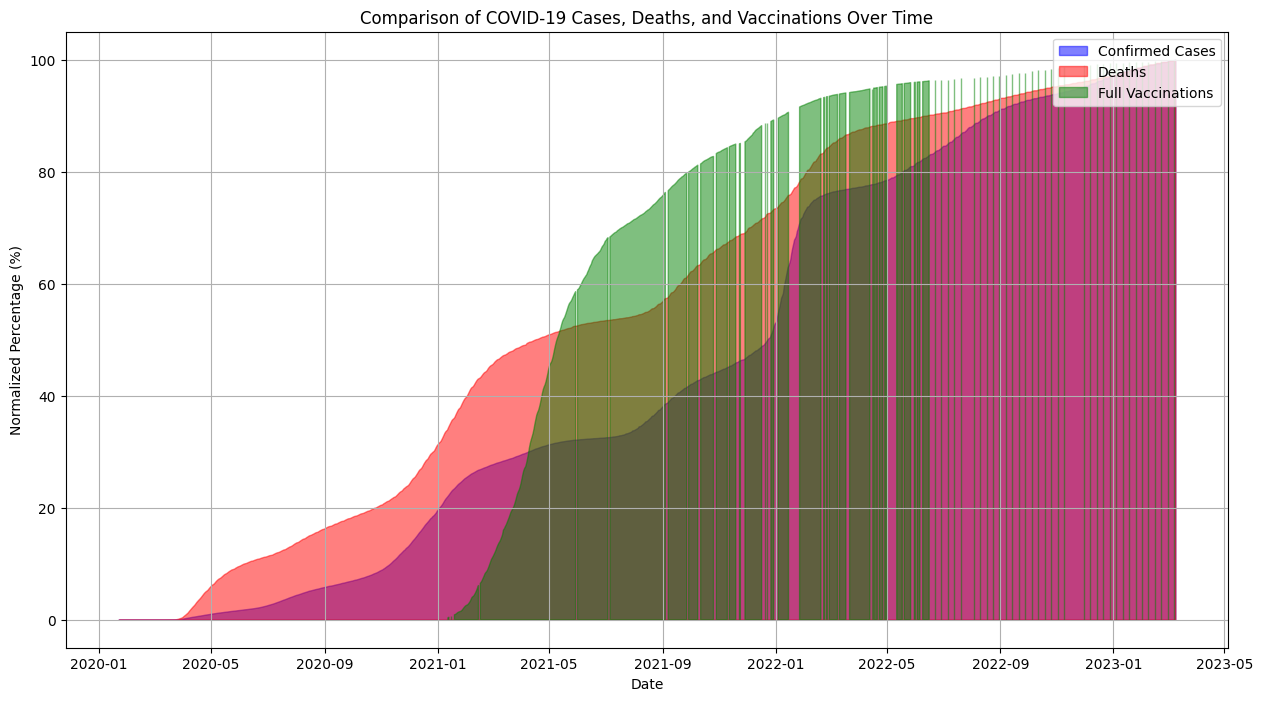

In [10]:
# Plotting the data
plt.figure(figsize=(15, 8))
plt.fill_between(dates, normalized_cases, color='blue', alpha=0.5, label='Confirmed Cases')
plt.fill_between(dates, normalized_deaths, color='red', alpha=0.5, label='Deaths')
plt.fill_between(dates, normalized_vaccinations.values, color='green', alpha=0.5, label='Full Vaccinations')
plt.title('Comparison of COVID-19 Cases, Deaths, and Vaccinations Over Time')
plt.xlabel('Date')
plt.ylabel('Normalized Percentage (%)')
plt.legend()
plt.grid(True)
plt.show()

In [ ]:
From the stacked area graph depicting the trends of COVID-19 confirmed cases, deaths, and vaccination rates over time:
1. Effectiveness of Vaccinations:
   - There is a noticeable correlation between the increase in vaccination rates and the subsequent declines in both confirmed cases and deaths. 
As the vaccination rates increase (green area), the peaks in cases and deaths (blue and red areas) start to diminish. This strongly suggests that 
vaccinations have been effective in reducing the severity and spread of COVID-19.

2. Temporal Lag in Impact:
   - The impact of vaccinations on reducing case numbers and death rates doesnt appear immediately but shows a lagged effect. After significant 
vaccination coverage is achieved, there is a gradual but steady decrease in case and death rates. This lag is expected due to the time it takes 
for immunity to build up in the population.

3. Initial and Subsequent Waves:
   - The graph may show multiple waves of infections, indicated by rises and falls in the case numbers. These waves reflect the dynamic nature of the 
pandemic, influenced by factors such as initial exposure, changes in public health policies, and variants of the virus.

4. Resurgence Despite Vaccinations:
   - There might be points where, despite a high rate of vaccinations, there are upticks in cases. This could be due to several factors such as the 
emergence of vaccine-resistant variants, incomplete vaccination coverage, or loosening of public health measures. It highlights the challenges of 
managing a pandemic solely through vaccinations and underscores the importance of a multi-faceted approach including masks, social distancing, and 
testing.

5. Comparative Scale of Impact:
   - The visualization helps in understanding the scale of impact over time. By normalizing the data, it is easier to compare the relative changes 
in cases, deaths, and vaccinations, providing a clearer picture of how the pandemic has evolved in response to public health interventions.

These insights are crucial for public health planning and response. They reinforce the importance of vaccinations in controlling the pandemic, 
while also showing that vaccinations must be part of a broader strategy that adapts to new challenges such as emerging variants and changes in 
public behavior. The graph serves as a visual summary of the pandemic’s trajectory and is an effective tool for communicating the progress and
challenges in managing COVID-19.